# **Online Retail Clustering**

In this nb we're going to develop an Unsupervised Learning model applying K-Means with sklearn. This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Feature Descriptions:**


**InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
<br>
**StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
<br>
**Description:** Product (item) name. Nominal. 
<br>
**Quantity:** The quantities of each product (item) per transaction. Numeric.	
<br>
**InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated. 
<br>
**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£). 
<br>
**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
<br>
**Country:** Country name. Nominal. The name of the country where a customer resides.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud


# Data Exploration

In [4]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name=1)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Note that there are some null values, lets get a better sense of them.

<Axes: >

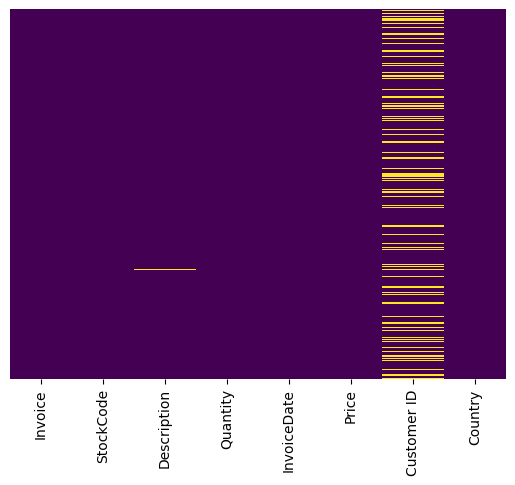

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
df[df["Customer ID"].isna()].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


If this were to be launch into production, whenever we had Customer ID missing, it would be impossible to categorize the customer any way. So even if these examples were to belong to an specific cluster, we would prefer not to use it for training, because it wouldn't be used for production.

In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


Note that there are negative quantities and selling negative quantities of a product doesn't make sense. Same for price. We'll need to work on that.

In [9]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [10]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
937,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [11]:
df[df['Price'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [12]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [14]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


We'll remove rows that start with either of the characters that appear in the array above.

In [15]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK'],
      dtype=object)

In [16]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

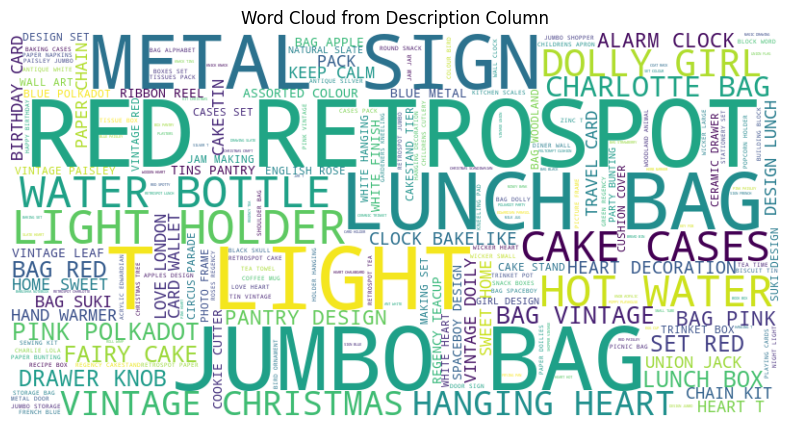

In [17]:
# Combine all text in the column into a single string
df['Description'] = df['Description'].astype('str')
text = " ".join(df['Description'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Description Column")
plt.show()


After this quick data exploration, here are the takeaways for data cleaning:
- There are Stock Codes that don't align with the rule for its format, so we'll remove them.
- There are letters at the beggining of some invoice numbers that are for special events, we'll remove them.
- Delete data with negative prices or quantities.
- Remove instances with missing customer ID.

# Data Cleaning

In [18]:
cleaned_df = df.copy()

In [19]:
# Cleaning Stock Codes
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')
cleaned_df = cleaned_df[(cleaned_df['StockCode'].str.match('^\\d{5}$') == True) | (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True)]

# Cleaning Invoice ID
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
cleaned_df = cleaned_df[cleaned_df['Invoice'].str.match('^\\d{6}$') == True]

# Cleaning Price and Qty
cleaned_df = cleaned_df[(cleaned_df['Price'] > 0) & (cleaned_df['Quantity'] > 0)]

# Cleaning Customer ID
cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [20]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,396337.000000,396337,396337.000000,396337.000000
mean,13.012547,2011-07-11 00:04:38.980463616,2.868222,15301.689416
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.641245,NaN,4.264663,1709.961948


In [21]:
len(cleaned_df)/len(df)

0.7313705227805355

We dropped about 27% of the data.

# Feature Engineering

In [22]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']*cleaned_df['Price']

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [24]:
aggregated_df = cleaned_df.groupby(by = 'Customer ID', as_index = False).agg(
    MonetaryValue = ('SalesLineTotal', "sum"),             # Total money customer has spent
    Frequency = ('Invoice', "nunique"),                    # Total purchases the customer has made
    LastInvoiceDate = ('InvoiceDate', "max"),              # Date of last purchase of the customer
    FirstInvoiceDate = ('InvoiceDate', "min"),             # Date of the first purchase the customer did
)

max_invoice_date = aggregated_df['LastInvoiceDate'].max()

aggregated_df['Tenure'] = (aggregated_df['LastInvoiceDate'] - aggregated_df['FirstInvoiceDate']).dt.days  # How long has the customer been with us

aggregated_df['Tenure'] = np.where(
    aggregated_df['Tenure'] == 0,
    (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days, aggregated_df['Tenure']
)


aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure
0,12346.0,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,2010-12-07 14:57:00,365
2,12348.0,1437.24,4,2011-09-25 13:13:00,2010-12-16 19:09:00,282
3,12349.0,1457.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,309
5,12352.0,1385.74,7,2011-11-03 14:37:00,2011-02-16 12:33:00,260
6,12353.0,89.00,1,2011-05-19 17:47:00,2011-05-19 17:47:00,203
7,12354.0,1079.40,1,2011-04-21 13:11:00,2011-04-21 13:11:00,231
8,12355.0,459.40,1,2011-05-09 13:49:00,2011-05-09 13:49:00,213
9,12356.0,2487.43,3,2011-11-17 08:40:00,2011-01-18 09:50:00,302


In [25]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days # How recently has the customer made its latest purchase

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,325,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,2010-12-07 14:57:00,365,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,2010-12-16 19:09:00,282,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,18,18
4,12350.0,294.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,309,309
5,12352.0,1385.74,7,2011-11-03 14:37:00,2011-02-16 12:33:00,260,35
6,12353.0,89.00,1,2011-05-19 17:47:00,2011-05-19 17:47:00,203,203
7,12354.0,1079.40,1,2011-04-21 13:11:00,2011-04-21 13:11:00,231,231
8,12355.0,459.40,1,2011-05-09 13:49:00,2011-05-09 13:49:00,213,213
9,12356.0,2487.43,3,2011-11-17 08:40:00,2011-01-18 09:50:00,302,22


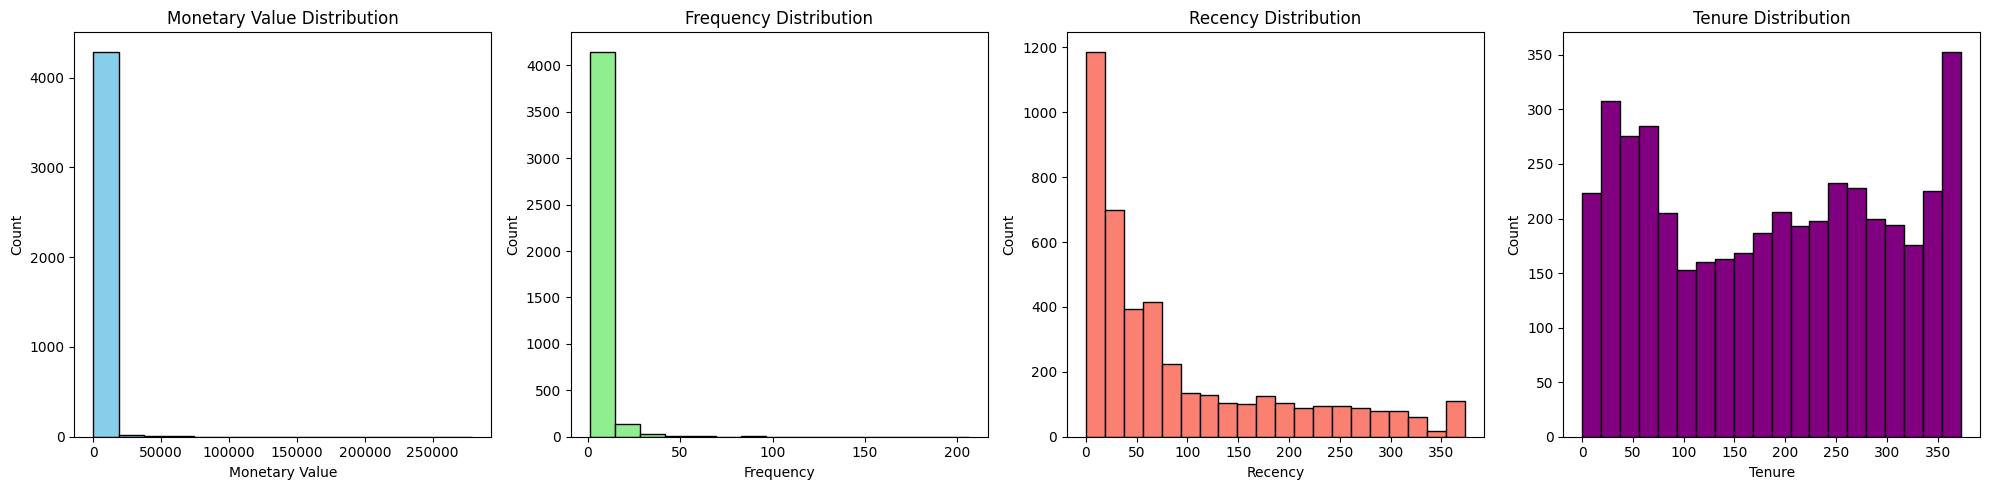

In [26]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=15, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 4, 2)
plt.hist(aggregated_df['Frequency'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 4, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.subplot(1, 4, 4)
plt.hist(aggregated_df['Tenure'], bins=20, color='purple', edgecolor='black')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

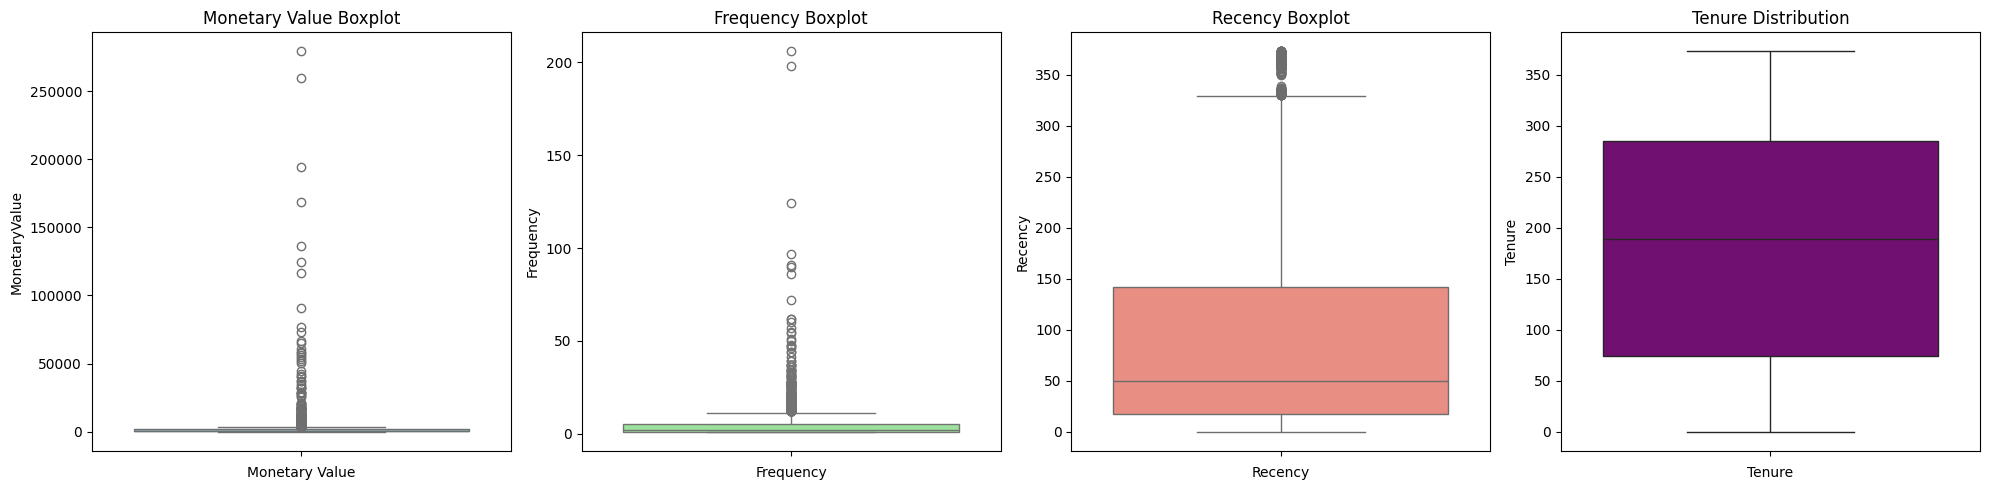

In [27]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 4, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 4, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.subplot(1, 4, 4)
sns.boxplot(data=aggregated_df['Tenure'], color='purple')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')

plt.tight_layout()
plt.show()

Looking at the data, it is easy to notice that there some outliers. It would be very easy to remove them, but customers with high monetary and high frequency values are the most important ones. We want to include them in the model so me can learn more about them and identify them. Both Tenure and Recency have a better distribution with very few outliers. We'll separate the dataset in 3 categories:
- Monetary value outliers
- Frequency outliers
- Not an outlier

In [28]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure,Recency
count,425.000000,425.000000,425.000000,425,425,425.000000,425.000000
mean,15033.644706,12568.004141,16.647059,2011-11-14 08:29:09.741176576,2011-01-20 08:38:34.588235264,300.416471,24.724706
min,12346.000000,3622.680000,1.000000,2010-12-02 15:27:00,2010-12-01 08:26:00,1.000000,0.000000
25%,13324.000000,4359.320000,8.000000,2011-11-15 14:22:00,2010-12-06 12:59:00,267.000000,3.000000
50%,15005.000000,5891.610000,12.000000,2011-11-29 12:09:00,2010-12-15 11:22:00,336.000000,10.000000
75%,16655.000000,9430.520000,19.000000,2011-12-06 12:09:00,2011-02-08 14:45:00,359.000000,23.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,2011-12-07 12:20:00,373.000000,371.000000
std,1797.854931,26097.899415,19.066978,NaN,NaN,83.385433,47.076383


In [29]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure,Recency
count,278.000000,278.000000,278.000000,278,278,278.000000,278.000000
mean,15355.669065,14488.006691,23.089928,2011-11-25 21:49:19.640287744,2010-12-27 10:32:49.208633088,332.971223,13.165468
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,2010-12-01 08:26:00,1.000000,0.000000
25%,13880.250000,4197.772500,13.000000,2011-11-23 20:17:15,2010-12-05 10:29:15,329.000000,2.000000
50%,15290.500000,6283.525000,17.000000,2011-12-03 13:42:00,2010-12-08 13:24:30,354.000000,5.500000
75%,16781.250000,11040.835000,25.000000,2011-12-07 12:15:30,2010-12-21 06:42:45,364.000000,15.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,2011-08-30 10:49:00,373.000000,371.000000
std,1745.001840,30142.778160,21.166586,NaN,NaN,52.844905,30.366616


In [30]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure,Recency
count,3863.000000,3863.000000,3863.000000,3863,3863,3863.000000,3863.000000
mean,15323.852705,853.814416,2.755113,2011-08-31 01:42:04.721718784,2011-05-13 04:22:53.771680256,171.898266,99.943826
min,12348.000000,3.750000,1.000000,2010-12-01 09:53:00,2010-12-01 08:34:00,0.000000,0.000000
25%,13850.500000,278.500000,1.000000,2011-07-01 15:21:00,2011-02-01 12:49:00,66.000000,21.000000
50%,15333.000000,570.460000,2.000000,2011-10-11 14:24:00,2011-04-19 11:27:00,171.000000,58.000000
75%,16798.000000,1187.005000,4.000000,2011-11-17 13:39:00,2011-09-08 10:28:00,266.000000,160.000000
max,18287.000000,3619.170000,11.000000,2011-12-09 12:50:00,2011-12-09 12:16:00,373.000000,373.000000
std,1709.731704,794.608100,2.168124,NaN,NaN,110.329560,101.866688


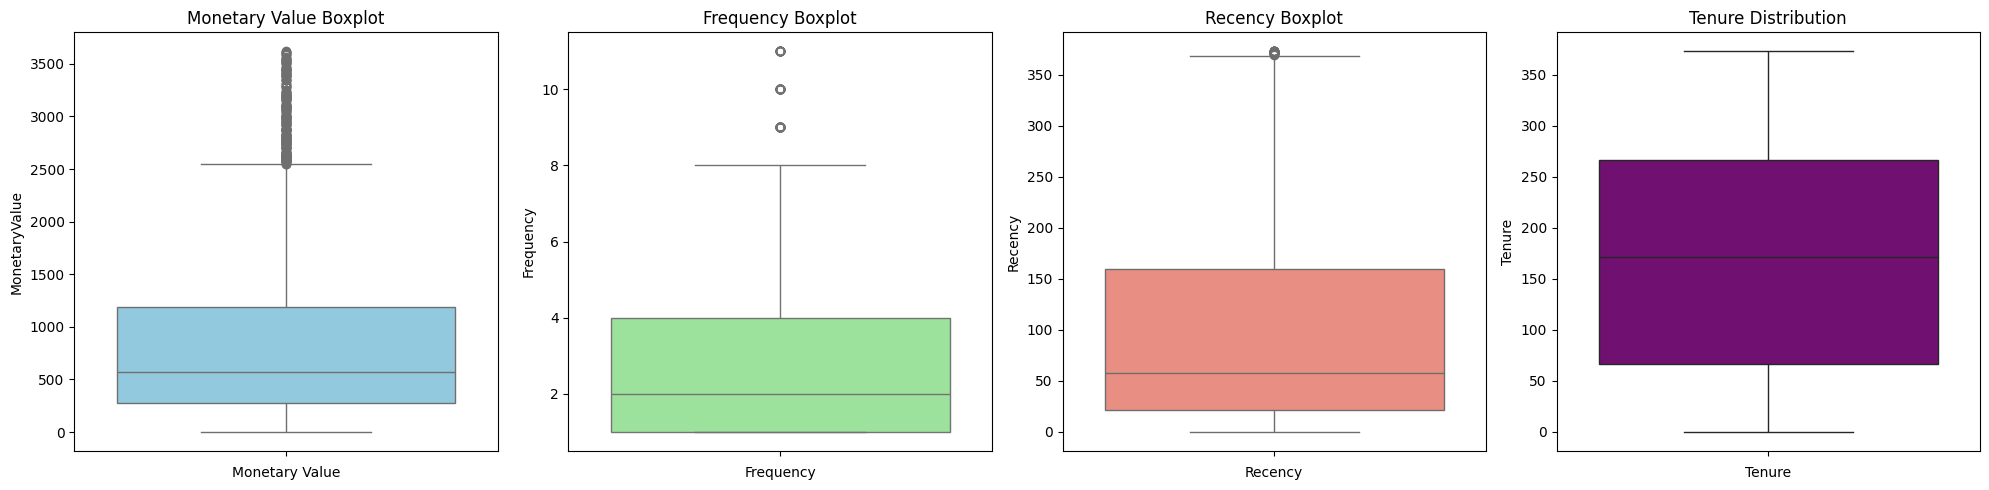

In [31]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 4, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 4, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.subplot(1,4, 4)
sns.boxplot(data=non_outliers_df['Tenure'], color='purple')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')

plt.tight_layout()
plt.show()

Notice that we still have outliers but now our data is not longer squashed at the botttom of the boxplot.

Now let us take a closer look at out data in 3D space.

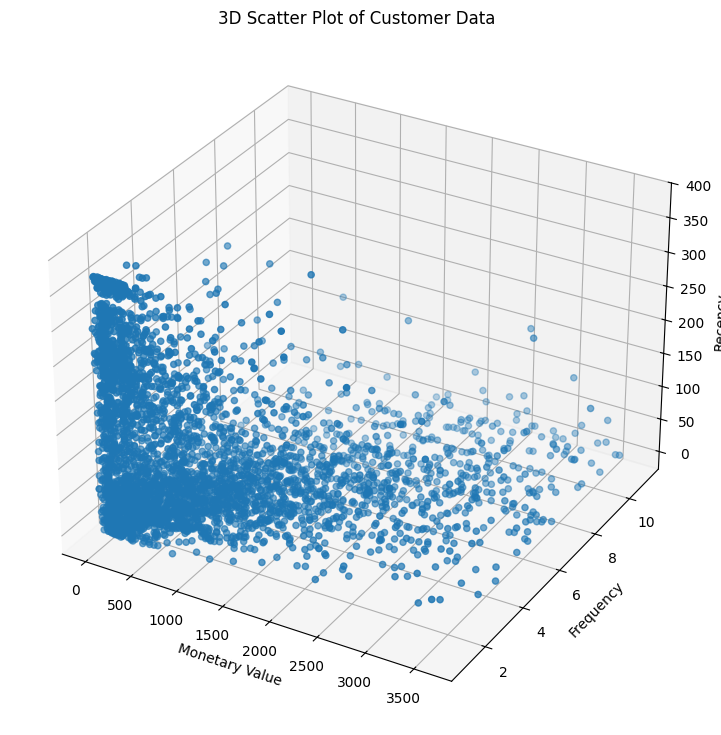

In [32]:
fig = plt.figure(figsize=(10, 9))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

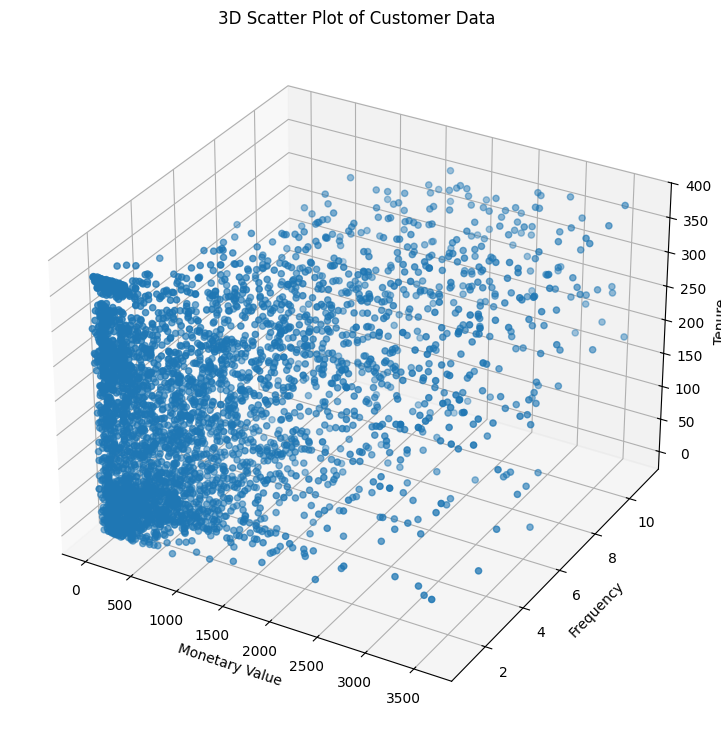

In [33]:
fig = plt.figure(figsize=(10, 9))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Tenure"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Tenure')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Notice that in both cases, the scale of the three axis is very different. If we don't normalize this data, then Monetary value would dictate were the clusters are since the distance between points and centroids will be practically determined entirely by it. By handling the features in the same scale, we'll make sure the algorithm is not affected by this situation. For this purpose, we'll use Standard scaling method.

In [34]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency", "Tenure"]])
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency", "Tenure"))

scaled_data_df

,MonetaryValue,Frequency,Recency,Tenure
2,0.734326,0.574252,-0.254717,0.998064
3,0.759889,-0.809612,-0.804526,-1.395077
4,-0.704104,-0.809612,2.052518,1.242817
5,0.669505,1.958116,-0.637620,0.798636
6,-0.962630,-0.809612,1.011808,0.281935
...,...,...,...,...
4328,-0.855771,-0.809612,-0.264535,-0.896506
4329,-0.847338,-0.809612,1.738342,0.952740
4330,-0.972926,-0.809612,0.785993,0.073442
4331,-0.850547,-0.348324,-0.912525,-0.488584


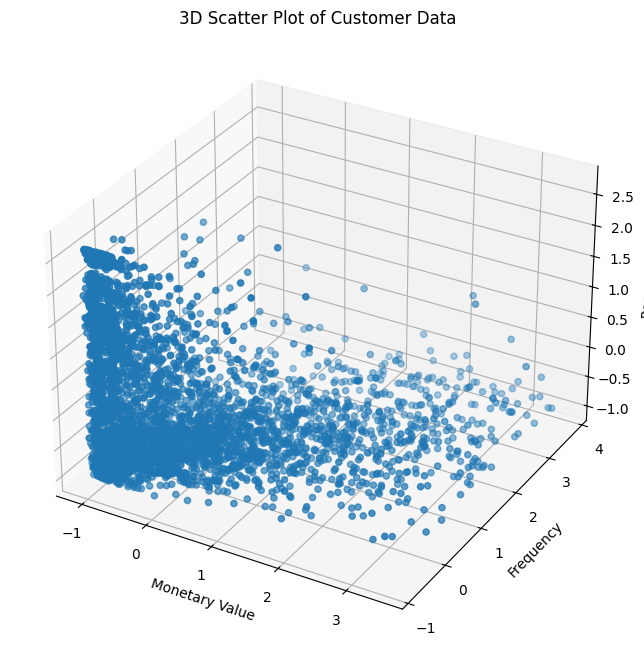

In [35]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

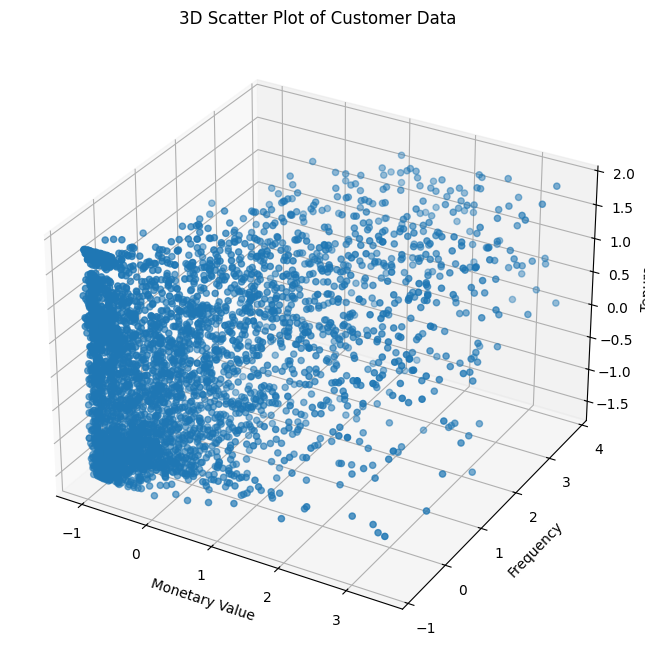

In [36]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Tenure"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Tenure')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# Modeling

First we need to find the appropiate number of clusters. For this we'll use the elbow method. This means we'll train several k-means models to generate a cost vs num. of clusters plot and identify the cluster number that resembles an elbow.

Note: This is not always the best way to go about it, normally there would a business context that would make it easy to guess or propose a cluster number.

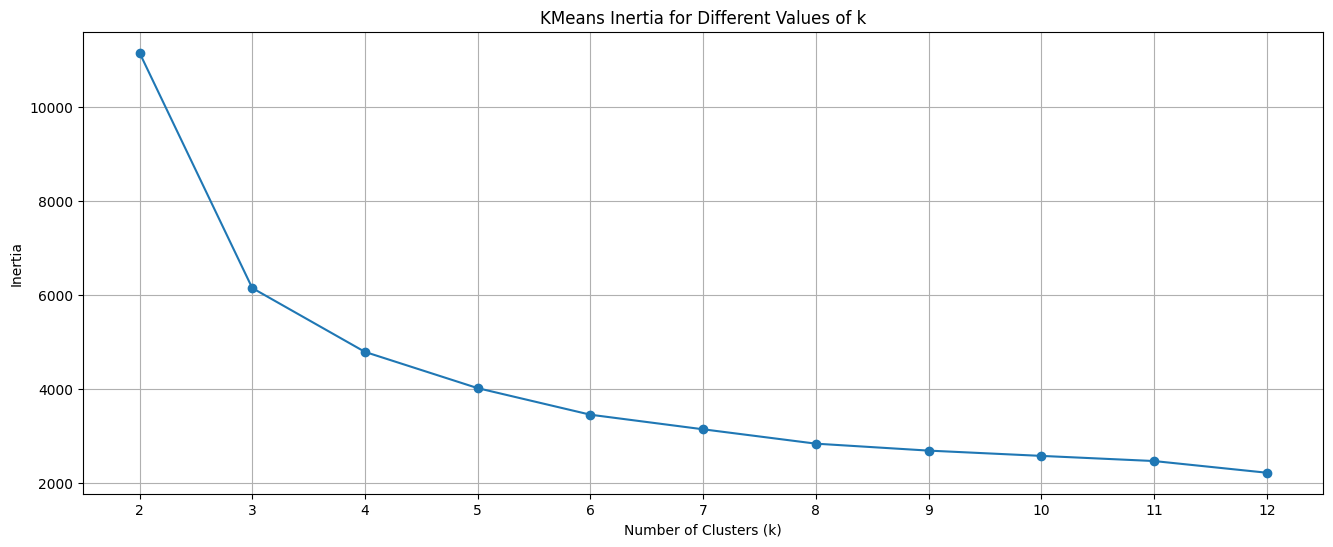

In [37]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 6))

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.show()

From the plot, we could say that the point at which we start to see that the inertia starts slowing down its improvement is at number of clusters = 3 or 4, after that the rate at which the inertia improves slows down significantly. There is another metric that measures the overlap between clusters called "Silhouette Score" it goes from -1 to 1, where 1 is perfect separation of clusters and -1 is complete overlapping between them. Lets see how that looks like as the number of clusters increases.

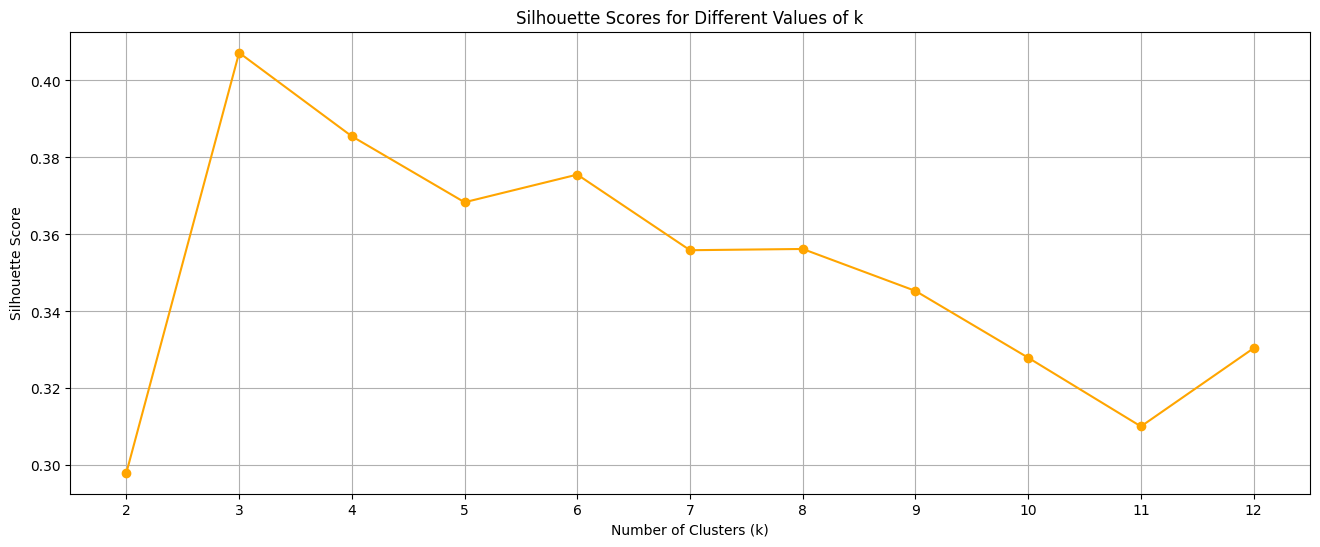

In [38]:
plt.figure(figsize=(16, 6))

plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.show()

Looking at the silhouette score, it is clear that number of clusters = 3 is both a small number of clusters (which is a better use of the algorithm) and has a relatively high inertia compared to the other number of cluster options. For those reason we will stay with Number of clusters = k = 3.

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\YT8MA4Q\AppData\Local\Temp\ipykernel_44296\4110064385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,2010-12-16 19:09:00,282,74,2
3,12349.0,1457.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,18,18,0
4,12350.0,294.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,309,309,1
5,12352.0,1385.74,7,2011-11-03 14:37:00,2011-02-16 12:33:00,260,35,2
6,12353.0,89.00,1,2011-05-19 17:47:00,2011-05-19 17:47:00,203,203,1
...,...,...,...,...,...,...,...,...
4328,18278.0,173.90,1,2011-09-27 11:58:00,2011-09-27 11:58:00,73,73,0
4329,18280.0,180.60,1,2011-03-07 09:52:00,2011-03-07 09:52:00,277,277,1
4330,18281.0,80.82,1,2011-06-12 10:53:00,2011-06-12 10:53:00,180,180,1
4331,18282.0,178.05,2,2011-12-02 11:43:00,2011-08-05 13:35:00,118,7,0


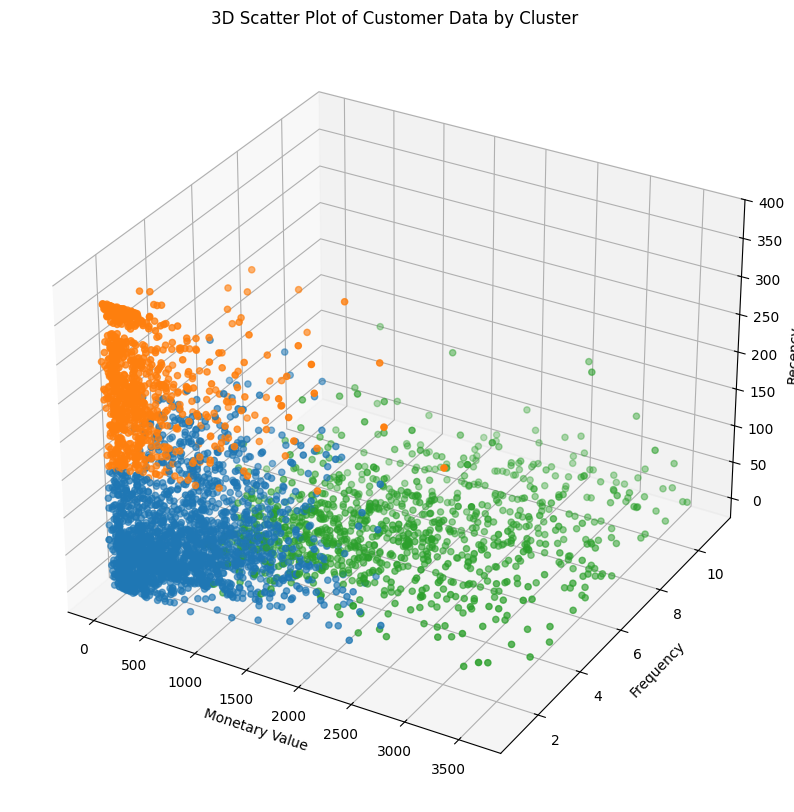

In [49]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c' } # Green

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

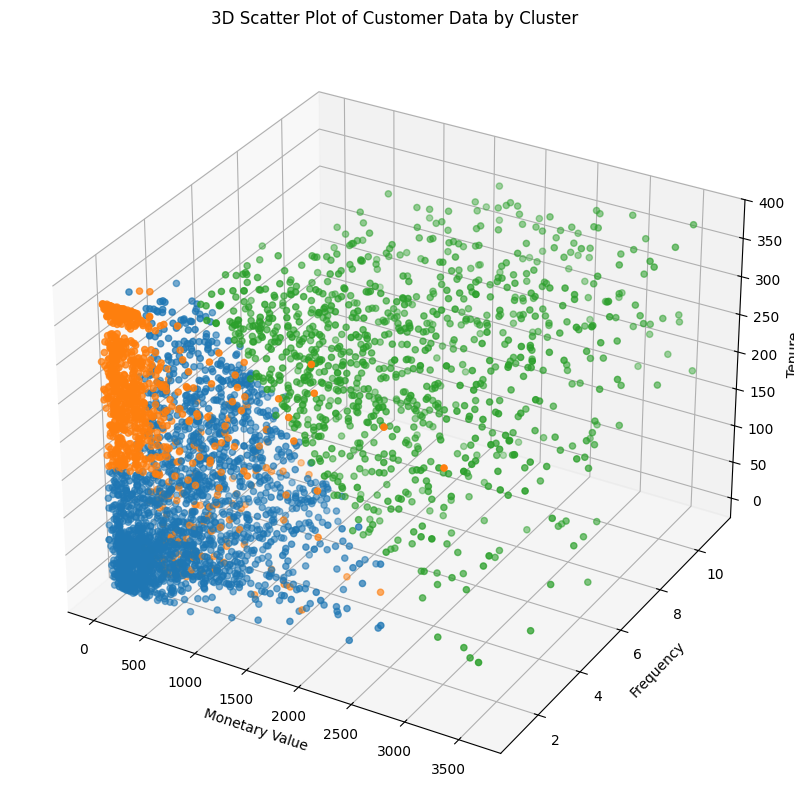

In [41]:
colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Tenure'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Tenure')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

In [44]:
non_outliers_df['PointSize'] = 10  # Adjust this value to make points smaller or larger


C:\Users\YT8MA4Q\AppData\Local\Temp\ipykernel_44296\2427625092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['PointSize'] = 10  # Adjust this value to make points smaller or larger


In [50]:

import plotly.express as px

fig = px.scatter_3d(
    non_outliers_df,
    x='MonetaryValue',
    y='Frequency',
    z='Recency',
    color='Cluster',
    size='PointSize',
    size_max=10,
    color_discrete_map=cluster_colors,
    title='Interactive 3D Scatter Plot of Customer Data by Cluster'
)


fig.update_layout(width=800, height=600)
fig.show()


In [51]:

fig = px.scatter_3d(
    non_outliers_df,
    x='MonetaryValue',
    y='Frequency',
    z='Tenure',
    color='Cluster',
    size='PointSize',
    size_max=10,
    color_discrete_map=cluster_colors,
    title='Interactive 3D Scatter Plot of Customer Data by Cluster'
)


fig.update_layout(width=800, height=600)
fig.show()


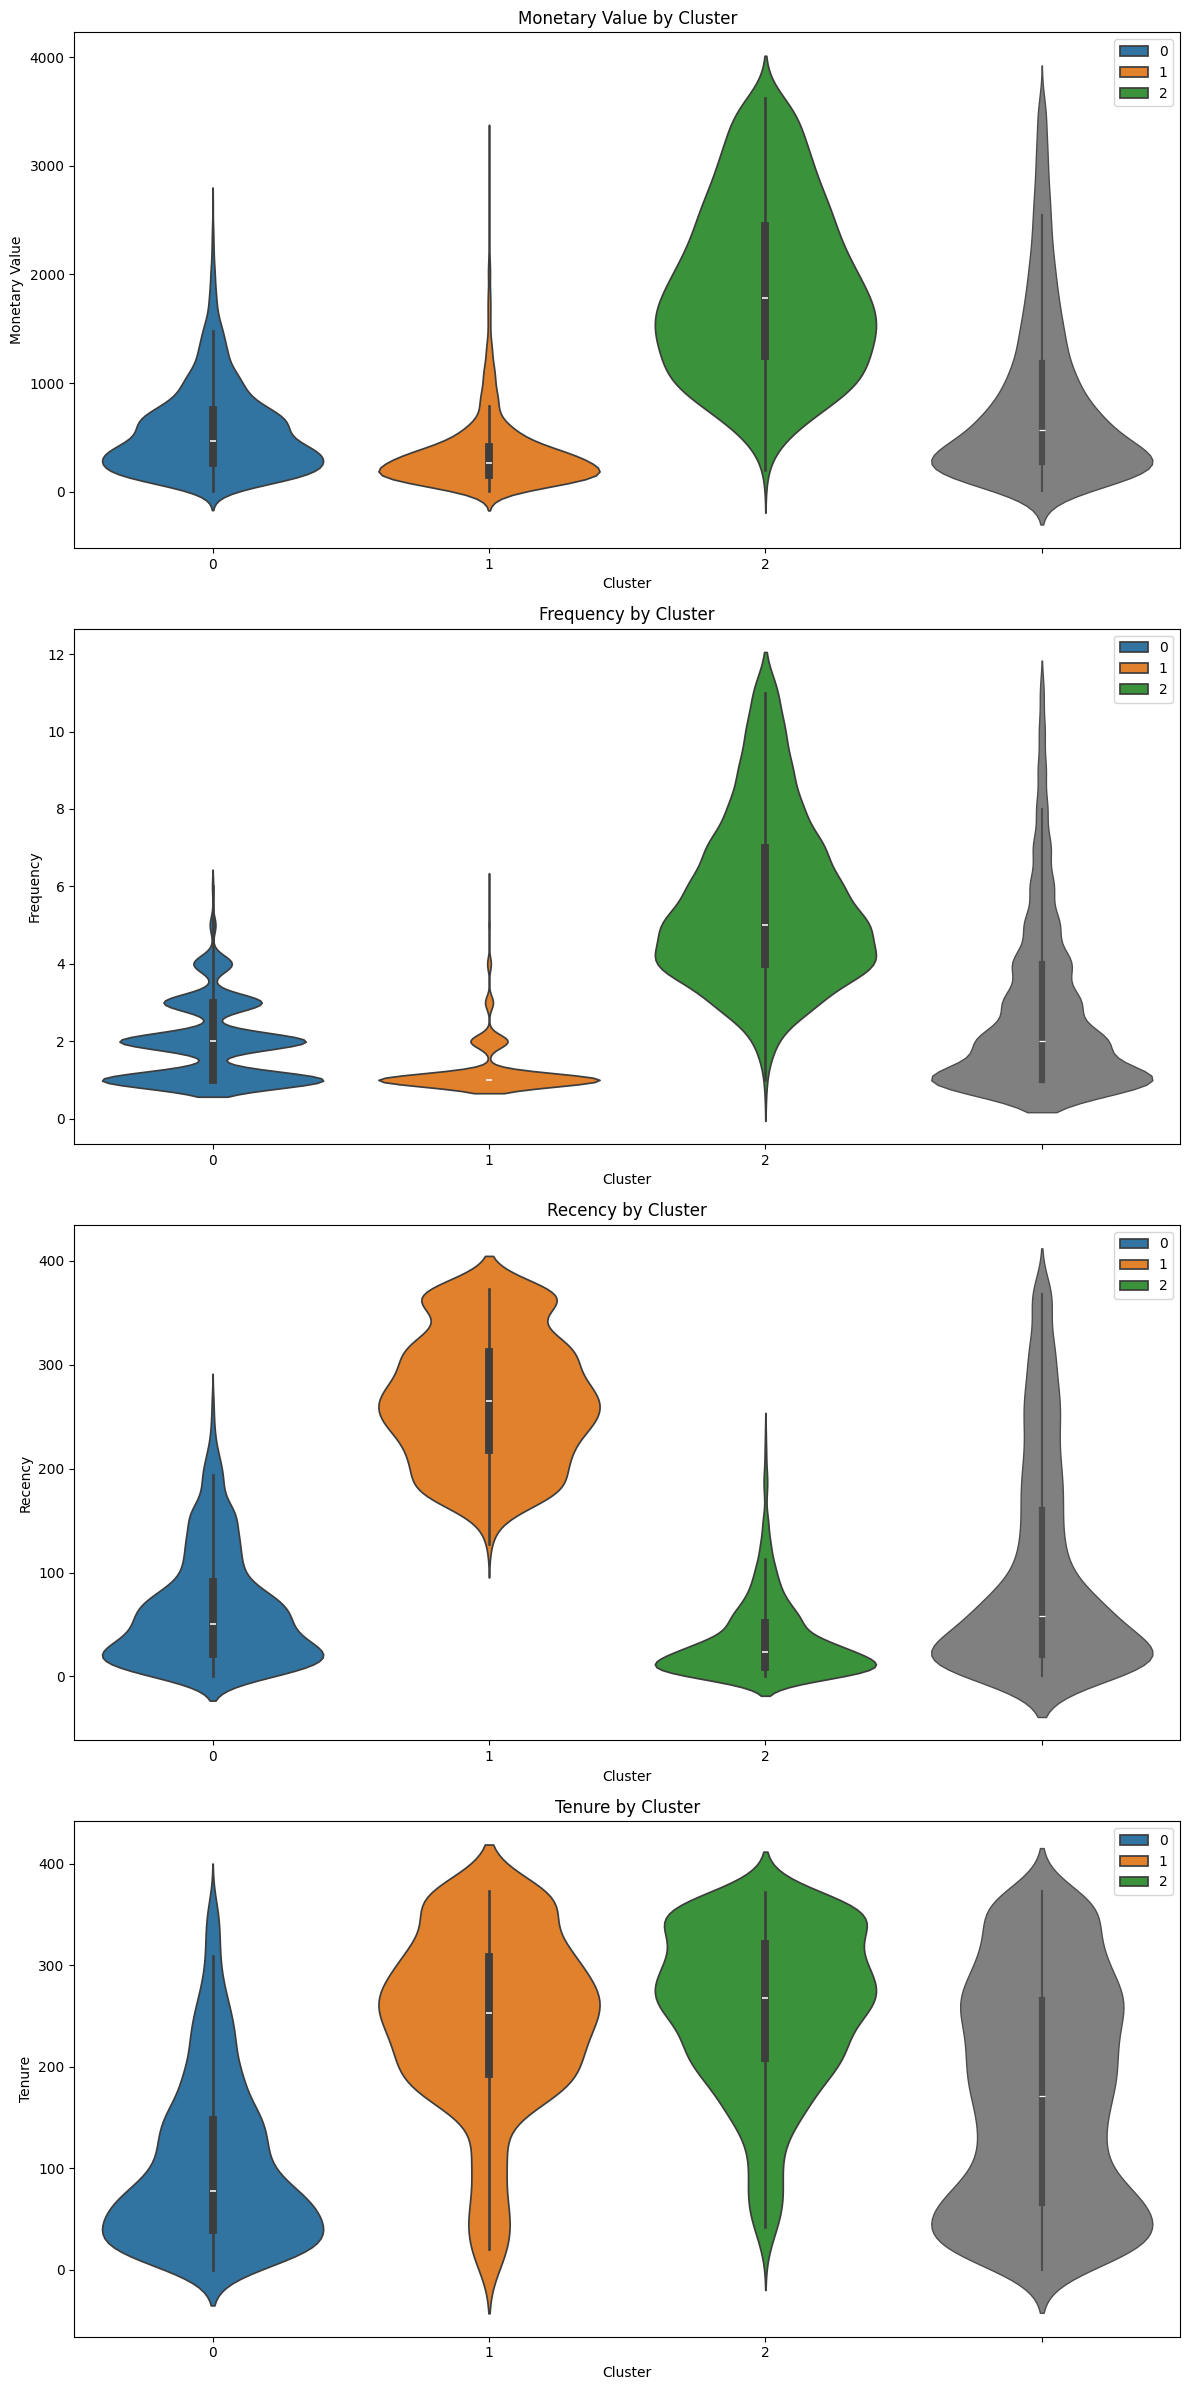

In [55]:
plt.figure(figsize=(12, 24))

plt.subplot(4, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(4, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(4, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.subplot(4, 1, 4)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Tenure'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Tenure'], color='gray', linewidth=1.0)
plt.title('Tenure by Cluster')
plt.ylabel('Tenure')

plt.tight_layout()
plt.show()

In [59]:
agg_non_outliers_df = non_outliers_df.groupby(by = 'Cluster', as_index = False).agg(
    Avg_MonetaryValue = ('MonetaryValue', "mean"),           
    Avg_Frequency = ('Frequency', "mean"),                 
    Avg_Recency = ('Recency', "mean"),              
    Avg_Tenure = ('Tenure', "mean"),
    Population_Size = ('MonetaryValue', "count"),       
    Wallet_Size = ('MonetaryValue', "sum"),     
)

agg_non_outliers_df

,Cluster,Avg_MonetaryValue,Avg_Frequency,Avg_Recency,Avg_Tenure,Population_Size,Wallet_Size
0,0,561.161780,1.954146,63.980000,102.231220,2050,1150381.65
1,1,353.256124,1.262454,267.377886,243.363305,823,290729.79
2,2,1875.932980,5.654545,35.224242,256.748485,990,1857173.65


Here are some first impressions of the 3 clusters and possible names for them:
- **Cluster 0 (Blue) Keep**: we propose this name because, while they don't have the highest avg monetary value, this cluster this cluster has interesting characteristics. It represents 53% of the studied population, they are our newest clients (which makes them more likely to churn) and they bring medium monetary value. This is likely composed of the middle class.

- **Cluster 1 (Orange) Recover**: they represent our lowest monetary value and lowest population size cluster and it has the highest recency by far which would indicate churn. They likely started out as *Keep*, but now they transitioned to Recover. We need a campaign to get these clients back and reduce the population size of this cluster. Not by loosing them, but by transforming their behaivor.

- **Cluster 2 (Green) Gold**: they represent customers that buy expensive and buy frequently. They average monetary value is 3 times bigger than the *Keep* cluster. They have been with us for the longest and they remain faithful. It would be very expensive to loose them and try to get them back. They represent 56% of our wallet.

That said, we still need to deal with the outliers. We can't ingore those customers even if they represent a very small size of the sample.

In [60]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,325,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,2010-12-07 14:57:00,365,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,2011-11-06 16:07:00,32,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,2011-01-12 12:43:00,274,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2011-02-17 10:30:00,292,2,-1
...,...,...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,2011-02-23 10:44:00,275,14,-3
4268,18198.0,5425.56,17,2011-12-05 14:49:00,2011-01-07 13:39:00,332,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,2010-12-16 16:42:00,353,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2010-12-09 15:46:00,361,2,-3


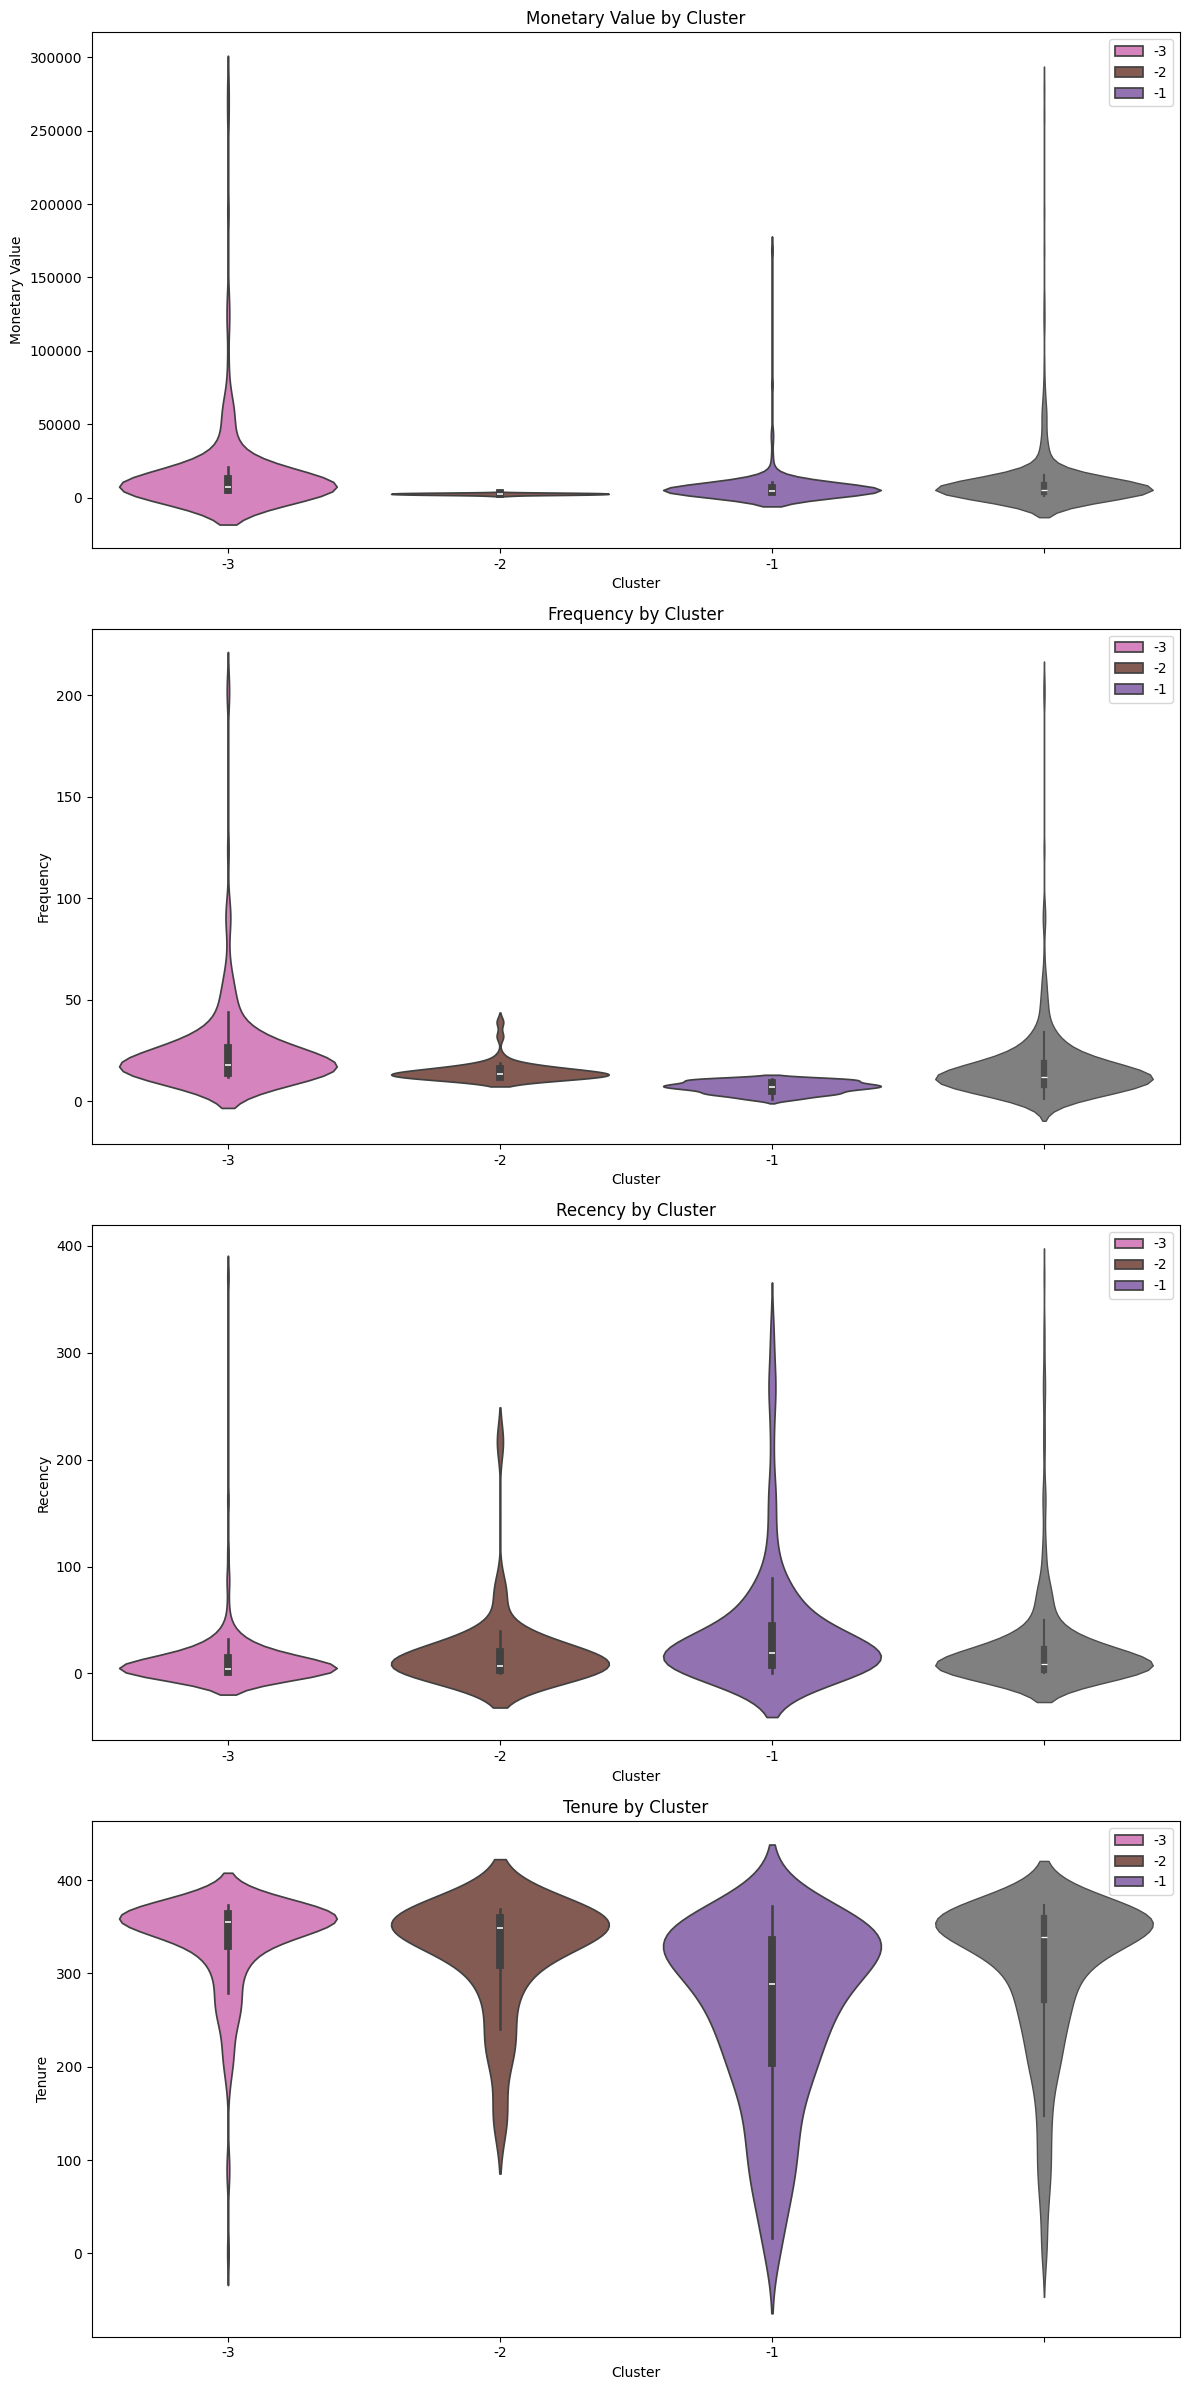

In [63]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 24))

plt.subplot(4, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(4, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(4, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.subplot(4, 1, 4)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Tenure'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Tenure'], color='gray', linewidth=1.0)
plt.title('Tenure by Cluster')
plt.ylabel('Tenure')

plt.tight_layout()
plt.show()

Here are the names for the "manual" clusters to handle outliers:

- Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [64]:
cluster_labels = {
    0: "KEEP",
    1: "RECOVER",
    2: "GOLD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,FirstInvoiceDate,Tenure,Recency,Cluster,PointSize,ClusterLabel
2,12348.0,1437.24,4,2011-09-25 13:13:00,2010-12-16 19:09:00,282,74,2,10.0,GOLD
3,12349.0,1457.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,18,18,0,10.0,KEEP
4,12350.0,294.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,309,309,1,10.0,RECOVER
5,12352.0,1385.74,7,2011-11-03 14:37:00,2011-02-16 12:33:00,260,35,2,10.0,GOLD
6,12353.0,89.00,1,2011-05-19 17:47:00,2011-05-19 17:47:00,203,203,1,10.0,RECOVER
...,...,...,...,...,...,...,...,...,...,...
4248,18172.0,7561.68,20,2011-11-25 11:12:00,2011-02-23 10:44:00,275,14,-3,NaN,DELIGHT
4268,18198.0,5425.56,17,2011-12-05 14:49:00,2011-01-07 13:39:00,332,3,-3,NaN,DELIGHT
4287,18223.0,6484.54,14,2011-12-05 09:11:00,2010-12-16 16:42:00,353,4,-3,NaN,DELIGHT
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2010-12-09 15:46:00,361,2,-3,NaN,DELIGHT


# **Summary of Results**

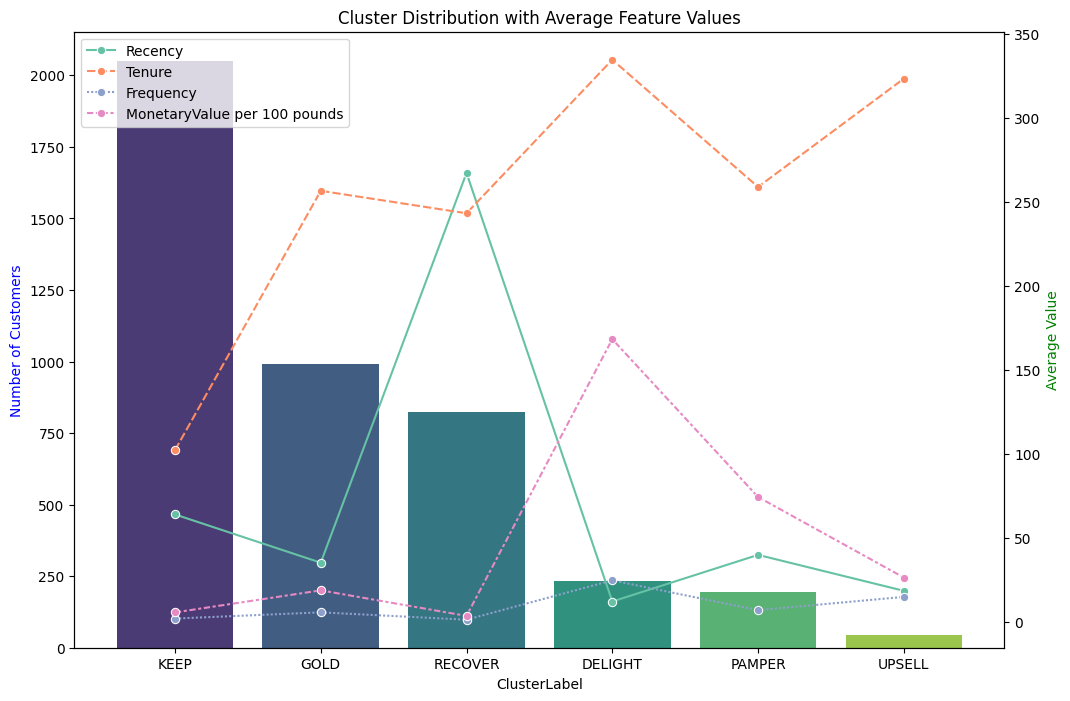

In [66]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Tenure', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

In the ultimate analysis we can say with confidence that we encounter 6 clusters of customers in total, 3 came out of the k means model results and the other 3 smaller clusters represent the outliers which are less frequent but still important to handle.

Cluster Definitions:

- **Cluster 0 (Blue) KEEP**: we propose this name because, while they don't have the highest avg monetary value, this cluster this cluster has interesting characteristics. It represents 53% of the studied population, they are our newest clients (which makes them more likely to churn) and they bring medium monetary value. This is likely composed of the middle class.

- **Cluster 1 (Orange) RECOVER**: they represent our lowest monetary value and lowest population size cluster and it has the highest recency by far which would indicate churn. They likely started out as *Keep*, but now they transitioned to Recover. We need a campaign to get these clients back and reduce the population size of this cluster. Not by loosing them, but by transforming their behaivor.

- **Cluster 2 (Green) GOLD**: they represent customers that buy expensive and buy frequently. They average monetary value is 3 times bigger than the *Keep* cluster. They have been with us for the longest and they remain faithful. It would be very expensive to loose them and try to get them back. They represent 56% of our wallet.

- **Cluster -1 (Monetary Outliers) PAMPER**: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- **Cluster -2 (Frequency Outliers) UPSELL**: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- **Cluster -3 (Monetary & Frequency Outliers) DELIGHT**: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.